<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [5]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data);

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [6]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
# <---CODING--->
	list_data_mean=[]
	count=0
	while(count<n_iterations):
		shape=np.random.choice(sample, sample_size, replace=True)
		# mean
		mean_shape=np.mean(shape);
		list_data_mean.append(mean_shape)
		# percentile
		
		#continue counting
		count+=1;
	#end while
	
	data_mean=np.mean(list_data_mean);
	lower=np.percentile(list_data_mean, 95, interpolation='lower')
	upper=np.percentile(list_data_mean, 95, interpolation='higher')
	#test
	print(data_mean);
	print(lower);
	print(upper);

	return data_mean, lower, upper

#test
#boostrap_mean (data,4,2);


9.5
7.25
11.75


In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 1000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
from google.colab import files
files.download('bootstrap_confidence.png') 



NameError: ignored


Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
# <---CODING--->
	list_data_mean=[]
	count=0;
	while(count<n_iterations):
		shape=np.random.choice(sample, sample_size, replace=True)
		# mean
		mean_shape=np.mean(shape);
		list_data_mean.append(mean_shape)
		# percentile
		
		#continue counting
		count+=1;
	#end while
	
	data_mean=np.mean(list_data_mean);
	lower=np.percentile(list_data_mean, ci, interpolation='lower')
	upper=np.percentile(list_data_mean, ci, interpolation='higher')
	#test
	print(data_mean);
	print(lower);
	print(upper);

	return data_mean, lower, upper

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
from google.colab import files
files.download('bootstrap_confidence_80.png') 


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


24.0
27.0
27.0


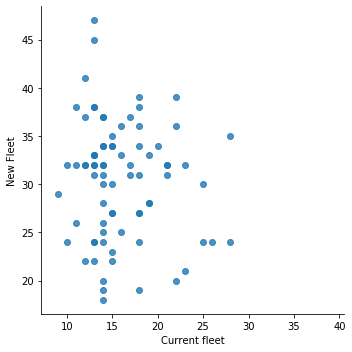

In [0]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
dfVehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dataCurrentFleet = dfVehicle.values.T[0]
dataNewFleet= dfVehicle.values.T[1]
sns.lmplot(dfVehicle.columns[0], dfVehicle.columns[1],
data=dfVehicle, fit_reg=False)

#sns.scatterplot(x="CurrentFleed", y="NewFleed", data=dfVehicle)

# Note: you can add more cells as needed to organise your code and your plots


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


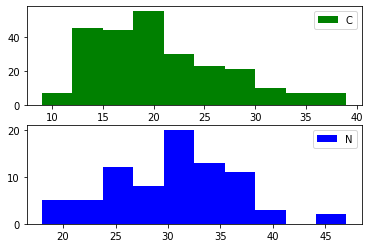

In [0]:

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.hist(dataCurrentFleet,color='g')
plt.legend("Current Fleet");
#plot cumulative dist
plt.subplot(2,1,2)
plt.hist(dataNewFleet,color='b')
plt.title="New Fleet";
plt.legend("New Fleet");

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

meanCurrentFleet=np.nanmean(dataCurrentFleet)
sigmaCF=np.std(dataCurrentFleet)
meanNewFleet=np.nanmean(dataNewFleet);


print("mean Current Fleets={}".format(meanCurrentFleet))
print("mean New Fleets={}".format(meanNewFleet))

mean Current Fleets=20.14457831325301
mean New Fleets=30.481012658227847
